### Training random forest models for the three fire types

We will use one set of test parameters to loop over 

In [1]:
import Modelling_tools as MT
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dataset = pd.read_csv("/Users/rmartinshort/Documents/Insight/Project/census_block_prediction/Fully_merged_dataset_Autogenerated_plus.csv")

In [3]:
#Do something about the NaNs
dataset['UnkownUseType'].fillna(1,inplace=True)
dataset['S'].fillna(1,inplace=True)
values = {'COMH':0, 'COMM':0, 'COMO':0, 'COMR':0, 'GOVT':0, 'IND':0, 'MISC':0,
       'MRES':0, 'SRES':0, 'A':0, 'B':0, 'C':0, 'D':0}
dataset = dataset.fillna(value=values)
dataset.fillna(dataset.mean(),inplace=True)

In [4]:
dataset.drop(['IDyear_x.1'],inplace=True,axis=1)

### Predicting structural fires

In [5]:
#Note that Xholdout and holdout are the same, only holdout contains a column that allows
#it to be joined to a geo dataframe for plotting
X,y,Xholdout,yholdout,Xuseforfuture,holdout,use_for_future = MT.setupdataset(dataset,fire_to_predict='SF_pred',yearto_holdout=2018)

In [6]:
test_parameters = {
        'classify__n_estimators': (50,100),
        'classify__max_depth': (5,8,10,20),
        'classify__min_samples_leaf':(1,5,10),
        'classify__class_weight':('balanced','balanced_subsample',None),
}


In [7]:
pipeline, gridsearch, testparams = MT.generate_pipeline_RC(test_parameters=test_parameters,select=True)

In [8]:
#Run grid search for the best model
Xcols, estimator_SF = MT.perform_grid_search(pipeline,gridsearch,X,y,testparams,list(X.columns),select=True)

Performing grid search...
pipeline: ['scale', 'select', 'classify']
parameters:
{'classify__n_estimators': (50, 100), 'classify__max_depth': (5, 8, 10, 20), 'classify__min_samples_leaf': (1, 5, 10), 'classify__class_weight': ('balanced', 'balanced_subsample', None)}
Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:  1.3min
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:  7.8min
[Parallel(n_jobs=4)]: Done 360 out of 360 | elapsed: 15.7min finished
/Users/rmartinshort/anaconda/envs/Insight/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/rmartinshort/anaconda/envs/Insight/lib/python3.6/site-packages/sklearn/base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/Users/rmartinshort/anaconda/envs/Insight/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0

done in 946.754s

Best score: 0.808
Best parameters set:
	classify__class_weight: None
	classify__max_depth: 8
	classify__min_samples_leaf: 5
	classify__n_estimators: 100


/Users/rmartinshort/anaconda/envs/Insight/lib/python3.6/site-packages/sklearn/pipeline.py:381: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


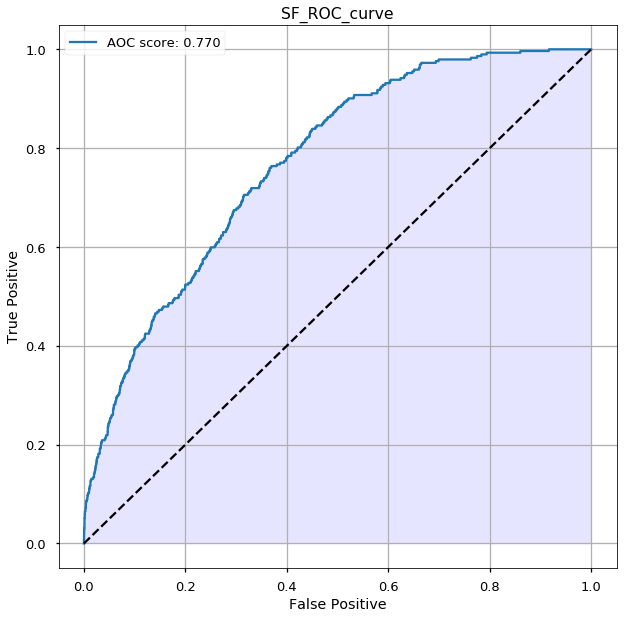

In [9]:
ROCplot, false_positive_SF, true_positive_SF, thresholds_SF = MT.plot_ROC_curve(Xholdout,yholdout,estimator_SF,title='SF_ROC_curve')

In [10]:
len(X)

73360

In [11]:
np.linspace(.01, 1.0, 10)

array([0.01, 0.12, 0.23, 0.34, 0.45, 0.56, 0.67, 0.78, 0.89, 1.  ])

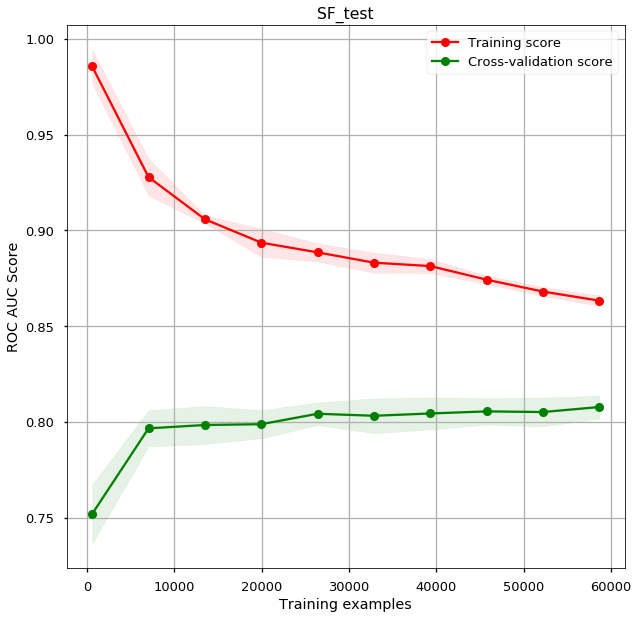

In [12]:
LC_SF = MT.plot_Learning_curve(estimator_SF,'SF_test',X,y,cv=5,n_jobs=4,train_sizes=np.linspace(.01, 1.0, 10))

Save the model!

In [13]:
import pickle

In [14]:
filename = 'Model_RC_SF.sav'
pickle.dump(estimator_SF, open(filename, 'wb'))

In [16]:
holdout.to_csv("2018_predictfires.csv",index=False)
use_for_future.to_csv("2019_predictfires.csv",index=False)

## Predicting vehicle fires

In [18]:
X,y,Xholdout,yholdout,Xuseforfuture,holdout,use_for_future = MT.setupdataset(dataset,fire_to_predict='VF_pred',yearto_holdout=2018)

In [19]:
pipeline, gridsearch, testparams = MT.generate_pipeline_RC(test_parameters=test_parameters,select=True)

In [20]:
#Run grid search for the best model
Xcols, estimator_VF = MT.perform_grid_search(pipeline,gridsearch,X,y,testparams,list(X.columns),select=True)

Performing grid search...
pipeline: ['scale', 'select', 'classify']
parameters:
{'classify__n_estimators': (50, 100), 'classify__max_depth': (5, 8, 10, 20), 'classify__min_samples_leaf': (1, 5, 10), 'classify__class_weight': ('balanced', 'balanced_subsample', None)}
Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:  1.6min
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:  8.4min
[Parallel(n_jobs=4)]: Done 360 out of 360 | elapsed: 15.7min finished
/Users/rmartinshort/anaconda/envs/Insight/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/rmartinshort/anaconda/envs/Insight/lib/python3.6/site-packages/sklearn/base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/Users/rmartinshort/anaconda/envs/Insight/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0

done in 946.550s

Best score: 0.766
Best parameters set:
	classify__class_weight: None
	classify__max_depth: 8
	classify__min_samples_leaf: 10
	classify__n_estimators: 50


/Users/rmartinshort/anaconda/envs/Insight/lib/python3.6/site-packages/sklearn/pipeline.py:381: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


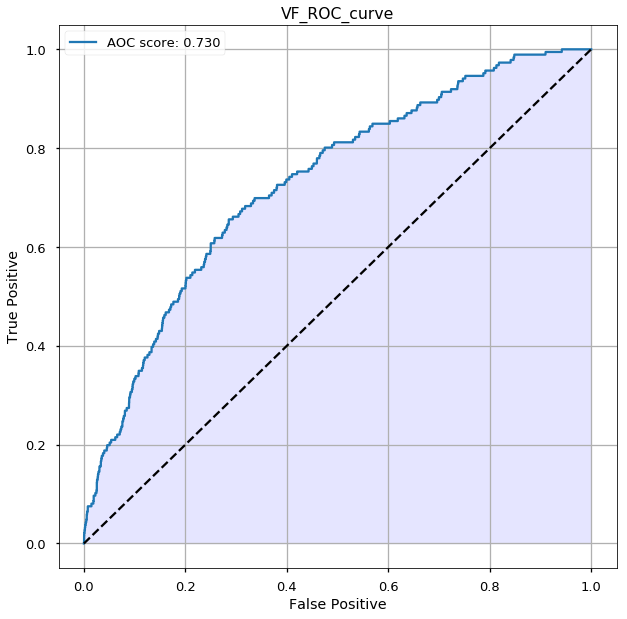

In [22]:
ROCplot, false_positive_VF, true_positive_VF, thresholds_VF = MT.plot_ROC_curve(Xholdout,yholdout,estimator_VF,title='VF_ROC_curve')

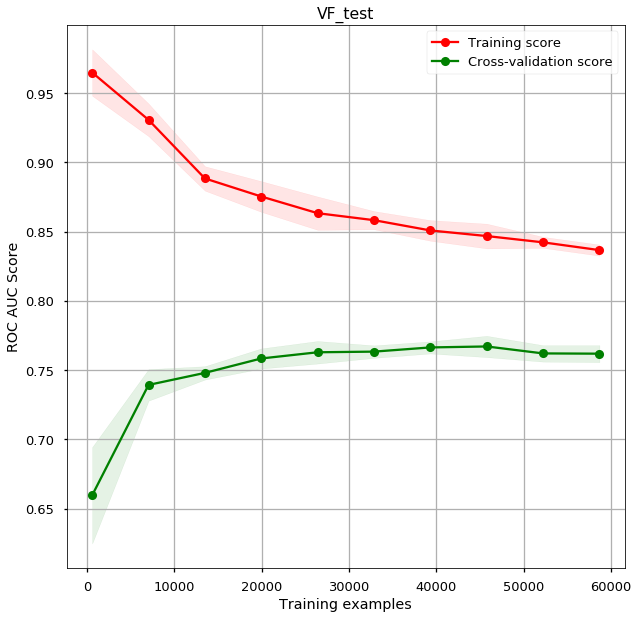

In [24]:
LC_VH = MT.plot_Learning_curve(estimator_VF,'VF_test',X,y,cv=5,n_jobs=4,train_sizes=np.linspace(.01, 1.0, 10))

In [25]:
filename = 'Model_RC_vehicle.sav'
pickle.dump(estimator_VF, open(filename, 'wb'))

### Predicting external fires

In [26]:
X,y,Xholdout,yholdout,Xuseforfuture,holdout,use_for_future = MT.setupdataset(dataset,fire_to_predict='EF_pred',yearto_holdout=2018)

In [27]:
pipeline, gridsearch, testparams = MT.generate_pipeline_RC(test_parameters=test_parameters,select=True)

In [28]:
#Run grid search for the best model
Xcols, estimator_EF = MT.perform_grid_search(pipeline,gridsearch,X,y,testparams,list(X.columns),select=True)

Performing grid search...
pipeline: ['scale', 'select', 'classify']
parameters:
{'classify__n_estimators': (50, 100), 'classify__max_depth': (5, 8, 10, 20), 'classify__min_samples_leaf': (1, 5, 10), 'classify__class_weight': ('balanced', 'balanced_subsample', None)}
Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:  1.7min
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:  8.7min
[Parallel(n_jobs=4)]: Done 360 out of 360 | elapsed: 16.5min finished
/Users/rmartinshort/anaconda/envs/Insight/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/rmartinshort/anaconda/envs/Insight/lib/python3.6/site-packages/sklearn/base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/Users/rmartinshort/anaconda/envs/Insight/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0

done in 998.270s

Best score: 0.839
Best parameters set:
	classify__class_weight: None
	classify__max_depth: 10
	classify__min_samples_leaf: 5
	classify__n_estimators: 100


/Users/rmartinshort/anaconda/envs/Insight/lib/python3.6/site-packages/sklearn/pipeline.py:381: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


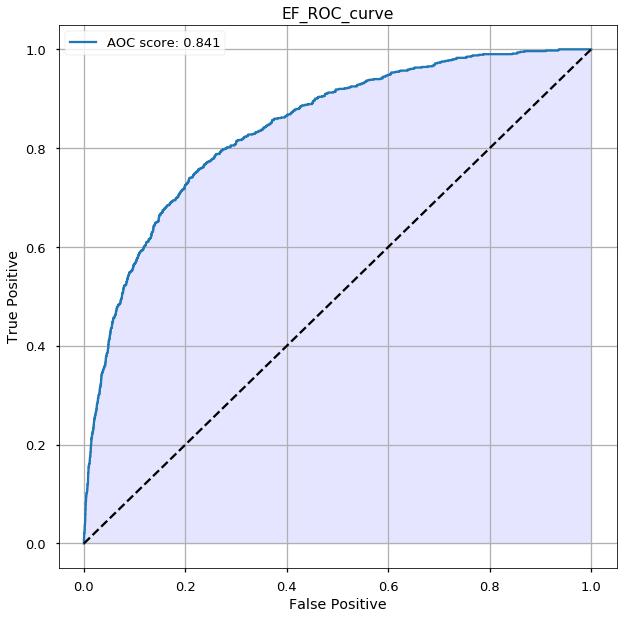

In [29]:
ROCplot, false_positive_EF, true_positive_EF, thresholds_EF = MT.plot_ROC_curve(Xholdout,yholdout,estimator_EF,title='EF_ROC_curve')

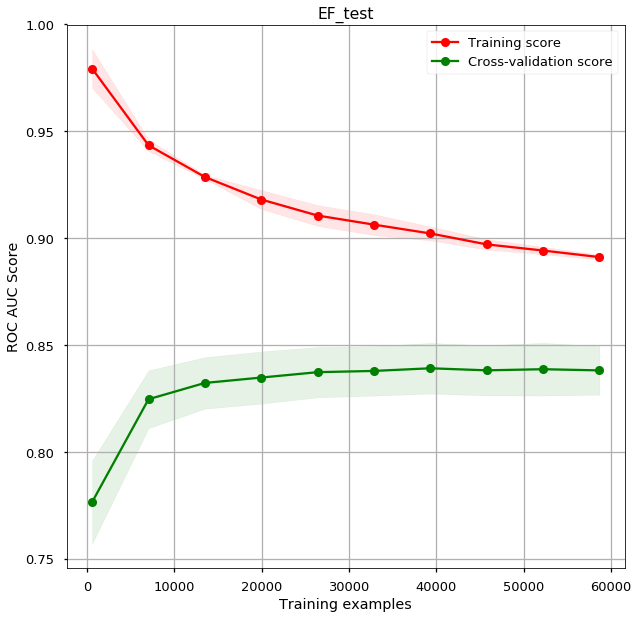

In [30]:
LC_EF = MT.plot_Learning_curve(estimator_EF,'EF_test',X,y,cv=5,n_jobs=4,train_sizes=np.linspace(.01, 1.0, 10))

In [31]:
filename = 'Model_RC_external.sav'
pickle.dump(estimator_EF, open(filename, 'wb'))

### Generate maps of 2018 and 2019 predictions

### 2019 predictions

In [32]:
GISCELLS = list(holdout['GISYEARJOIN'])

In [37]:
SF_blocks_years = gpd.read_file('SF_block_years_2010.shp')
mapdata = SF_blocks_years[SF_blocks_years['GISYEARJOI'].isin(GISCELLS)]

In [34]:
EF_2018_pred = estimator_EF.predict_proba(Xholdout)
SF_2018_pred = estimator_SF.predict_proba(Xholdout)
VF_2018_pred = estimator_VF.predict_proba(Xholdout)

/Users/rmartinshort/anaconda/envs/Insight/lib/python3.6/site-packages/sklearn/pipeline.py:381: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/Users/rmartinshort/anaconda/envs/Insight/lib/python3.6/site-packages/sklearn/pipeline.py:381: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/Users/rmartinshort/anaconda/envs/Insight/lib/python3.6/site-packages/sklearn/pipeline.py:381: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


In [38]:
EF_2019_pred = estimator_EF.predict_proba(Xuseforfuture)
SF_2019_pred = estimator_SF.predict_proba(Xuseforfuture)
VF_2019_pred = estimator_VF.predict_proba(Xuseforfuture)

/Users/rmartinshort/anaconda/envs/Insight/lib/python3.6/site-packages/sklearn/pipeline.py:381: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/Users/rmartinshort/anaconda/envs/Insight/lib/python3.6/site-packages/sklearn/pipeline.py:381: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/Users/rmartinshort/anaconda/envs/Insight/lib/python3.6/site-packages/sklearn/pipeline.py:381: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


In [39]:
riskmap_2019 = gpd.GeoDataFrame({'geometry':mapdata['geometry'],'fprob_EF':EF_2019_pred[:,1],
                        'fprob_VF':VF_2019_pred[:,1],'fprob_SF':SF_2019_pred[:,1]})

In [58]:
from branca.utilities import split_six
import folium
from folium.plugins import MarkerCluster

In [43]:
## For 2019, EF

riskmap_2019['BLOCKID'] = np.arange(len(riskmap_2019))
gdf_wgs84 = riskmap_2019.copy()
gdf_wgs84.crs = {'init': 'epsg:4326', 'no_defs': True}

thresh_scale = split_six(riskmap_2019['fprob_EF'])

m = folium.Map(location=[37.76, -122.42],zoom_start=13,
               tiles="CartoDB positron",
              width='100%',
              height='100%')
m.choropleth(geo_data=gdf_wgs84.to_json(),data=riskmap_2019,columns=['BLOCKID','fprob_EF'],
             key_on = 'feature.properties.{}'.format('BLOCKID'),
             max_zoom=16,
             fill_opacity=0.8,
             fill_color='OrRd',
             line_opacity=0.1,
             highlight=True,
             legend_name='Probability of fire',
             legend_scale=thresh_scale)
m.add_child(folium.LatLngPopup())

m.save("external_2019.html")

/Users/rmartinshort/anaconda/envs/Insight/lib/python3.6/site-packages/folium/folium.py:432: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


In [44]:
## For 2019, SF

riskmap_2019['BLOCKID'] = np.arange(len(riskmap_2019))
gdf_wgs84 = riskmap_2019.copy()
gdf_wgs84.crs = {'init': 'epsg:4326', 'no_defs': True}

thresh_scale = split_six(riskmap_2019['fprob_SF'])

m = folium.Map(location=[37.76, -122.42],zoom_start=13,
               tiles="CartoDB positron",
              width='100%',
              height='100%')
m.choropleth(geo_data=gdf_wgs84.to_json(),data=riskmap_2019,columns=['BLOCKID','fprob_SF'],
             key_on = 'feature.properties.{}'.format('BLOCKID'),
             max_zoom=16,
             fill_opacity=0.8,
             fill_color='OrRd',
             line_opacity=0.1,
             highlight=True,
             legend_name='Probability of fire',
             legend_scale=thresh_scale)
m.add_child(folium.LatLngPopup())

m.save("structure_2019.html")

In [45]:
## For 2019, VF

riskmap_2019['BLOCKID'] = np.arange(len(riskmap_2019))
gdf_wgs84 = riskmap_2019.copy()
gdf_wgs84.crs = {'init': 'epsg:4326', 'no_defs': True}

thresh_scale = split_six(riskmap_2019['fprob_VF'])

m = folium.Map(location=[37.76, -122.42],zoom_start=13,
               tiles="CartoDB positron",
              width='100%',
              height='100%')
m.choropleth(geo_data=gdf_wgs84.to_json(),data=riskmap_2019,columns=['BLOCKID','fprob_VF'],
             key_on = 'feature.properties.{}'.format('BLOCKID'),
             max_zoom=16,
             fill_opacity=0.8,
             fill_color='OrRd',
             line_opacity=0.1,
             highlight=True,
             legend_name='Probability of fire',
             legend_scale=thresh_scale)
m.add_child(folium.LatLngPopup())

m.save("vehicle_2019.html")

### 2018 predictions

In [46]:
EF_2018_pred = estimator_EF.predict_proba(Xholdout)
SF_2018_pred = estimator_SF.predict_proba(Xholdout)
VF_2018_pred = estimator_VF.predict_proba(Xholdout)

/Users/rmartinshort/anaconda/envs/Insight/lib/python3.6/site-packages/sklearn/pipeline.py:381: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/Users/rmartinshort/anaconda/envs/Insight/lib/python3.6/site-packages/sklearn/pipeline.py:381: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/Users/rmartinshort/anaconda/envs/Insight/lib/python3.6/site-packages/sklearn/pipeline.py:381: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


In [47]:
riskmap_2018 = gpd.GeoDataFrame({'geometry':mapdata['geometry'],'fprob_EF':EF_2019_pred[:,1],
                        'fprob_VF':VF_2019_pred[:,1],'fprob_SF':SF_2019_pred[:,1]})

In [48]:
fires_2018 = pd.read_csv("2018_fires.csv")

In [69]:
## For 2018, EF

riskmap_2018['BLOCKID'] = np.arange(len(riskmap_2018))
gdf_wgs84 = riskmap_2018.copy()
gdf_wgs84.crs = {'init': 'epsg:4326', 'no_defs': True}

thresh_scale = split_six(riskmap_2018['fprob_EF'])

m = folium.Map(location=[37.76, -122.42],zoom_start=13,
               tiles="CartoDB positron",
              width='100%',
              height='100%')
m.choropleth(geo_data=gdf_wgs84.to_json(),data=riskmap_2018,columns=['BLOCKID','fprob_EF'],
             key_on = 'feature.properties.{}'.format('BLOCKID'),
             max_zoom=16,
             fill_opacity=0.8,
             fill_color='OrRd',
             line_opacity=0.1,
             highlight=True,
             legend_name='Probability of fire',
             legend_scale=thresh_scale)

#Add the locations of actual fires
coords = []
popups = []
icons = []
for index, row in fires_2018.iterrows():
    if row['EF'] == 1:
        lat = row['Lat']
        lon = row['Lon']
        popup = 'Lat: %.4f, Lon: %.4f' %(lat,lon)
        coords.append([lat,lon])
        popups.append(popup)
        icons.append(folium.Icon(color='white', 
                              icon_color='red', 
                              icon='fire', 
                              angle=0,
                              prefix='fa'))

plt_lyr = folium.FeatureGroup(name = 'External fires')

plt_lyr.add_children(MarkerCluster(locations = coords, popups = popups,icons = icons, overlay=True))
m.add_children(plt_lyr)

m.add_child(folium.LatLngPopup())

folium.LayerControl().add_to(m)

m.save("external_2018.html")

/Users/rmartinshort/anaconda/envs/Insight/lib/python3.6/site-packages/ipykernel_launcher.py:42: FutureWarning: Method `add_children` is deprecated. Please use `add_child` instead.
/Users/rmartinshort/anaconda/envs/Insight/lib/python3.6/site-packages/ipykernel_launcher.py:43: FutureWarning: Method `add_children` is deprecated. Please use `add_child` instead.


In [67]:
## For 2018, SF

riskmap_2018['BLOCKID'] = np.arange(len(riskmap_2018))
gdf_wgs84 = riskmap_2018.copy()
gdf_wgs84.crs = {'init': 'epsg:4326', 'no_defs': True}

thresh_scale = split_six(riskmap_2018['fprob_SF'])

m = folium.Map(location=[37.76, -122.42],zoom_start=13,
               tiles="CartoDB positron",
              width='100%',
              height='100%')
m.choropleth(geo_data=gdf_wgs84.to_json(),data=riskmap_2018,columns=['BLOCKID','fprob_SF'],
             key_on = 'feature.properties.{}'.format('BLOCKID'),
             max_zoom=16,
             fill_opacity=0.8,
             fill_color='OrRd',
             line_opacity=0.1,
             highlight=True,
             legend_name='Probability of fire',
             legend_scale=thresh_scale)

#Add the locations of actual fires
coords = []
popups = []
icons = []
for index, row in fires_2018.iterrows():
    if row['SF'] == 1:
        lat = row['Lat']
        lon = row['Lon']
        popup = 'Lat: %.4f, Lon: %.4f' %(lat,lon)
        coords.append([lat,lon])
        popups.append(popup)
        icons.append(folium.Icon(color='white', 
                              icon_color='red', 
                              icon='fire', 
                              angle=0,
                              prefix='fa'))

plt_lyr = folium.FeatureGroup(name = 'Structural fires')

plt_lyr.add_children(MarkerCluster(locations = coords, popups = popups,icons = icons, overlay=True))
m.add_children(plt_lyr)

m.add_child(folium.LatLngPopup())

folium.LayerControl().add_to(m)

m.save("structural_2018.html")

/Users/rmartinshort/anaconda/envs/Insight/lib/python3.6/site-packages/ipykernel_launcher.py:42: FutureWarning: Method `add_children` is deprecated. Please use `add_child` instead.
/Users/rmartinshort/anaconda/envs/Insight/lib/python3.6/site-packages/ipykernel_launcher.py:43: FutureWarning: Method `add_children` is deprecated. Please use `add_child` instead.


In [68]:
## For 2018, VF

riskmap_2018['BLOCKID'] = np.arange(len(riskmap_2018))
gdf_wgs84 = riskmap_2018.copy()
gdf_wgs84.crs = {'init': 'epsg:4326', 'no_defs': True}

thresh_scale = split_six(riskmap_2018['fprob_VF'])

m = folium.Map(location=[37.76, -122.42],zoom_start=13,
               tiles="CartoDB positron",
              width='100%',
              height='100%')
m.choropleth(geo_data=gdf_wgs84.to_json(),data=riskmap_2018,columns=['BLOCKID','fprob_VF'],
             key_on = 'feature.properties.{}'.format('BLOCKID'),
             max_zoom=16,
             fill_opacity=0.8,
             fill_color='OrRd',
             line_opacity=0.1,
             highlight=True,
             legend_name='Probability of fire',
             legend_scale=thresh_scale)

#Add the locations of actual fires
coords = []
popups = []
icons = []
for index, row in fires_2018.iterrows():
    if row['VF'] == 1:
        lat = row['Lat']
        lon = row['Lon']
        popup = 'Lat: %.4f, Lon: %.4f' %(lat,lon)
        coords.append([lat,lon])
        popups.append(popup)
        icons.append(folium.Icon(color='white', 
                              icon_color='red', 
                              icon='fire', 
                              angle=0,
                              prefix='fa'))

plt_lyr = folium.FeatureGroup(name = 'Vehicle fires')

plt_lyr.add_children(MarkerCluster(locations = coords, popups = popups,icons = icons, overlay=True))
m.add_children(plt_lyr)

m.add_child(folium.LatLngPopup())

folium.LayerControl().add_to(m)

m.save("vehicle_2018.html")

/Users/rmartinshort/anaconda/envs/Insight/lib/python3.6/site-packages/ipykernel_launcher.py:42: FutureWarning: Method `add_children` is deprecated. Please use `add_child` instead.
/Users/rmartinshort/anaconda/envs/Insight/lib/python3.6/site-packages/ipykernel_launcher.py:43: FutureWarning: Method `add_children` is deprecated. Please use `add_child` instead.
